In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import os
for dirname,_,filenames in os.walk('/content/drive/MyDrive/ASE/Audio_Project_2/splitted_data'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

/content/drive/MyDrive/ASE/Audio_Project_2/splitted_data/X_train.csv
/content/drive/MyDrive/ASE/Audio_Project_2/splitted_data/X_test.csv
/content/drive/MyDrive/ASE/Audio_Project_2/splitted_data/y_train.csv
/content/drive/MyDrive/ASE/Audio_Project_2/splitted_data/y_test.csv


In [3]:
X_train=pd.read_csv('/content/drive/MyDrive/ASE/Audio_Project_2/splitted_data/X_train.csv')
X_test=pd.read_csv('/content/drive/MyDrive/ASE/Audio_Project_2/splitted_data/X_test.csv')
y_train=pd.read_csv('/content/drive/MyDrive/ASE/Audio_Project_2/splitted_data/y_train.csv')
y_test=pd.read_csv('/content/drive/MyDrive/ASE/Audio_Project_2/splitted_data/y_test.csv')

In [4]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(299, 26) (75, 26) (299, 1) (75, 1)


In [5]:
X_train.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,mfcc21
0,-1.449894,1.700759,0.231830,0.356590,0.603051,-0.585164,0.709871,-0.210382,-0.689462,0.311622,...,-0.192246,0.514565,-0.664419,2.124879,-0.413276,-2.186299,1.207002,-2.083045,-1.058400,-0.495107
1,-1.552770,0.367961,-0.604055,-0.821058,-1.178491,-0.346411,0.650920,-1.032177,-1.875719,-0.290735,...,-1.243046,1.266888,-1.398701,0.970545,-1.360347,-2.827067,1.287470,-2.411237,0.138701,0.078322
2,0.965586,-0.375507,-0.613423,0.282677,-0.555344,-0.666274,-0.353780,1.522327,0.672128,0.568428,...,-0.319286,1.384791,0.236368,-0.239166,0.665197,1.063334,-2.193728,1.832499,-0.700110,-0.721187
3,0.476341,0.240495,-0.144542,0.830966,0.683639,-0.951087,0.279694,0.230220,0.271695,0.943190,...,-1.014379,-1.036918,1.213495,-1.789283,0.755328,-0.067696,-0.779513,1.268824,-0.645840,-0.683700
4,0.685036,-1.742477,0.635271,0.761962,0.040548,0.616814,-1.702316,-0.259460,1.092214,-1.477821,...,0.386425,-0.025386,0.799931,0.571565,-0.795688,1.362373,0.568708,1.078809,1.482001,1.680475


In [6]:
y_train.head()

,class
0,1
1,1
2,0
3,0
4,1


In [7]:
X_test.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,mfcc21
0,0.292580,1.006771,0.639680,0.870380,0.333529,0.547580,1.424737,-0.469018,0.599494,1.051444,...,-0.597609,0.189015,-0.432135,-0.045547,0.474931,1.111390,-1.477736,0.392556,-0.303961,-1.091498
1,-0.567522,-0.031771,-0.915117,-0.110564,-0.698753,-1.002334,0.136702,0.679868,-0.359780,0.436967,...,-1.063988,-0.067381,-0.613151,-1.418880,0.761491,-0.224713,-1.453242,0.261351,-0.641659,-0.657530
2,-1.045081,1.520539,-0.051639,-0.047403,-0.129024,-0.267703,0.971334,-0.974089,-1.093423,0.240662,...,-0.388768,0.592454,-1.175231,1.090397,-0.854230,-1.707942,0.917124,-1.584468,-0.002463,-0.021123
3,0.304015,-1.341689,-0.380320,-0.005764,-0.385950,-0.401481,-1.378147,-1.451009,0.074955,0.432588,...,-0.379407,0.814828,0.147352,1.476400,-0.637670,-0.818983,1.551767,-0.537524,0.243766,0.026260
4,0.451422,0.341175,-0.623974,-0.652582,-0.542794,-0.766282,0.339822,0.281907,-1.474910,0.880778,...,-0.261834,-0.273050,-0.156616,-1.094812,1.134920,1.230511,-0.507435,0.968915,-1.318431,-0.652767


In [8]:
y_test.head()

,class
0,0
1,0
2,1
3,1
4,0


In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input,Dense,Dropout,BatchNormalization
from tensorflow.keras.utils import to_categorical

In [10]:
y_train=to_categorical(y_train.values.ravel())
y_test=to_categorical(y_test.values.ravel())

In [11]:
model=Sequential()
model.add(Input(X_train.shape[1],))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.4))
model.add(Dense(units=2,activation='sigmoid'))

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                864       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                        

In [14]:
history=model.fit(x=X_train.values,y=y_train,batch_size=16,epochs=500,validation_data=(X_test.values,y_test))

Epoch 1/500
19/19 [==============================] - 5s 23ms/step - loss: 0.5768 - accuracy: 0.7960 - val_loss: 0.6391 - val_accuracy: 0.7067
Epoch 2/500
19/19 [==============================] - 0s 7ms/step - loss: 0.1809 - accuracy: 0.9498 - val_loss: 0.5894 - val_accuracy: 0.7067
Epoch 3/500
19/19 [==============================] - 0s 8ms/step - loss: 0.1264 - accuracy: 0.9632 - val_loss: 0.5235 - val_accuracy: 0.8933
Epoch 4/500
19/19 [==============================] - 0s 7ms/step - loss: 0.0530 - accuracy: 0.9900 - val_loss: 0.4447 - val_accuracy: 0.9467
Epoch 5/500
19/19 [==============================] - 0s 7ms/step - loss: 0.0563 - accuracy: 0.9766 - val_loss: 0.3693 - val_accuracy: 0.9600
Epoch 6/500
19/19 [==============================] - 0s 6ms/step - loss: 0.0264 - accuracy: 1.0000 - val_loss: 0.2894 - val_accuracy: 0.9733
Epoch 7/500
19/19 [==============================] - 0s 6ms/step - loss: 0.0367 - accuracy: 0.9900 - val_loss: 0.2185 - val_accuracy: 0.9867
Epoch 8/500


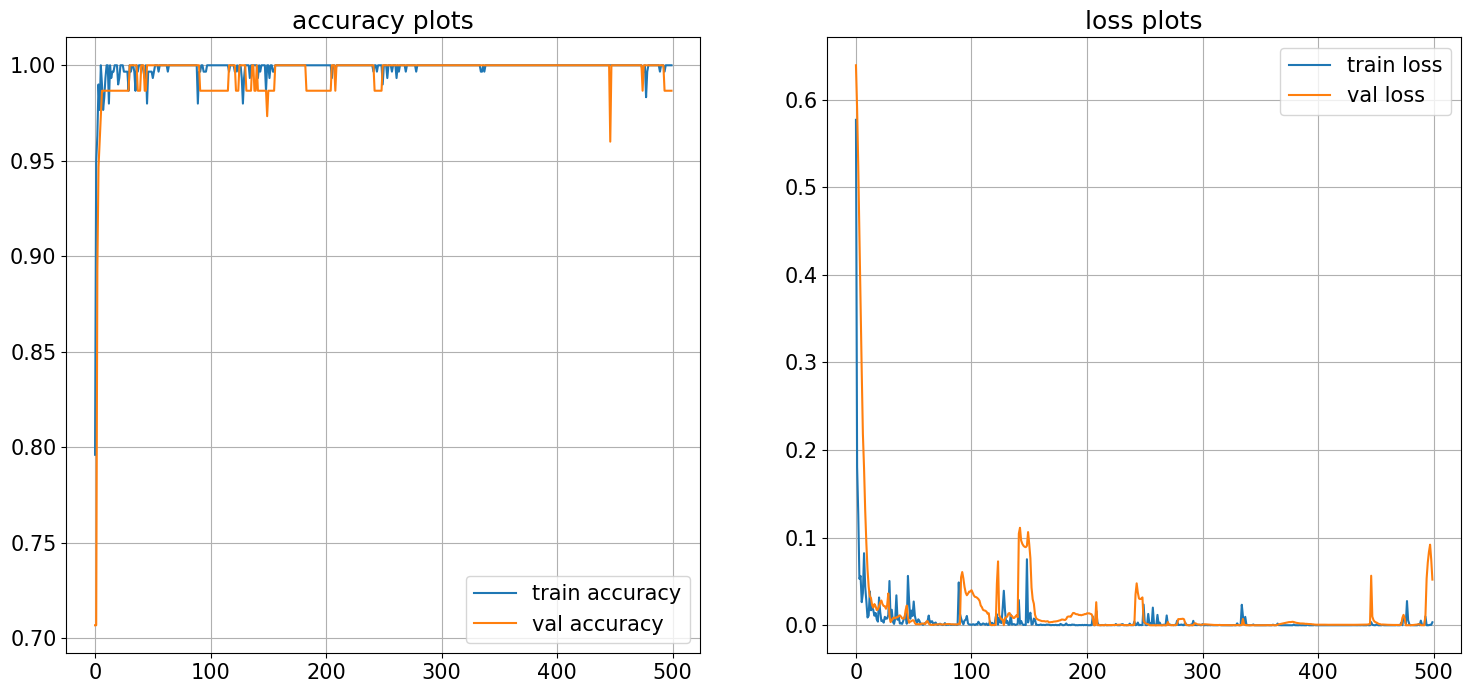

In [15]:
plt.figure(figsize=(18,8))
plt.rcParams['font.size']=15
plt.subplot(121)
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.title(label='accuracy plots')
plt.legend()
plt.grid()
plt.subplot(122)
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.title(label='loss plots')
plt.legend()
plt.grid()
plt.show()

In [16]:
prediction=model.predict(X_test.values)
print(prediction)

3/3 [==============================] - 0s 4ms/step
[[1.00000000e+00 4.73511841e-10]
 [1.00000000e+00 3.12409210e-10]
 [1.22105147e-12 1.00000000e+00]
 [3.65809293e-11 1.00000000e+00]
 [1.00000000e+00 1.81981253e-12]
 [6.98365366e-09 1.00000000e+00]
 [2.25554967e-13 1.00000000e+00]
 [1.00000000e+00 3.90221293e-11]
 [1.18621429e-07 9.99999940e-01]
 [1.00000000e+00 1.06101013e-11]
 [1.00000000e+00 2.05859482e-10]
 [1.00000000e+00 1.80934823e-10]
 [1.00000000e+00 5.28173824e-11]
 [1.00000000e+00 2.16043317e-09]
 [1.00000000e+00 1.07441825e-11]
 [1.00000000e+00 1.31460823e-11]
 [1.84966792e-10 1.00000000e+00]
 [1.00000000e+00 9.39716100e-12]
 [1.30013250e-05 9.99994695e-01]
 [1.18934975e-11 1.00000000e+00]
 [9.96358514e-01 2.70855427e-03]
 [2.13632126e-10 1.00000000e+00]
 [1.00000000e+00 4.37153820e-11]
 [1.00000000e+00 2.32365568e-11]
 [2.00372506e-06 9.99999404e-01]
 [1.86600904e-08 1.00000000e+00]
 [1.10368216e-11 1.00000000e+00]
 [1.15536851e-10 1.00000000e+00]
 [4.98480760e-13 1.000000

In [17]:
predicted_labels=np.argmax(prediction,axis=1)
print(predicted_labels)

[0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1
 1]


In [18]:
true_labels=np.argmax(y_test,axis=1)
print(true_labels)

[0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1
 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1
 1]


In [26]:
class_labels=['UnAuthorised','Authorised']

In [27]:
ann_accuracy=accuracy_score(y_true=true_labels,y_pred=predicted_labels)
print(f'Validation accuracy of ArtificialNeuralNetwork is {ann_accuracy*100.0:.2f}%')

Validation accuracy of ArtificialNeuralNetwork is 98.67%


In [28]:
print(classification_report(y_true=true_labels,y_pred=predicted_labels,target_names=class_labels))

              precision    recall  f1-score   support

UnAuthorised       1.00      0.97      0.99        38
  Authorised       0.97      1.00      0.99        37

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



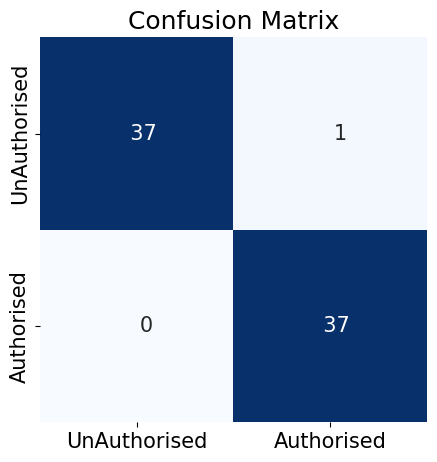

In [29]:
plt.figure(figsize=(5,5))
sns.heatmap(data=confusion_matrix(y_true=true_labels,y_pred=predicted_labels),
           annot=True,
           fmt='4d',
           xticklabels=class_labels,
           yticklabels=class_labels,
           cbar=False,
           cmap=plt.cm.Blues)
plt.title(label='Confusion Matrix')
plt.show()

In [32]:
model.save("/content/drive/MyDrive/ASE/Audio_Project_2/models/ArtificialNeuralNetwork_model_v1.h5")